## 1. ESTRATEGIA EXTRAÍDA DEL LIBRO DE IVY PORTFOLIO

1.1. Se selecciona el activo con mejor momentum entre un universo de 5 activos: ['EFA', 'SPY', 'GSG', 'IYR', 'AGG', 'BIL'] (el ETF de BIL cuando los respectivos momentums son negativos). Se trabaja con la media móvil de 10 ruedas en mensual SMA-10 y se rebalancea de forma mensual

In [13]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

# Función para calcular el momentum
def calculate_momentum(prices, lookback_period):
    momentum = prices / prices.rolling(window=lookback_period).mean() - 1
    return momentum

# Función para obtener los datos históricos de los activos
def get_historical_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    return data

# Lista de tickers de los activos
tickers = ['EFA', 'SPY', 'GSG', 'IYR', 'AGG', 'BIL'] 

# Fechas de inicio y fin para obtener los datos históricos
today = datetime.today()
end_date = today
start_date = end_date - timedelta(days=360*2)  # Diferencia de tiempo para mostrar los últimos 12 meses

print(start_date)
print(end_date)

# Obtener los datos históricos de los activos
historical_data = get_historical_data(tickers, start_date, end_date)

# Calcular los precios mensuales
monthly_prices = historical_data.resample('ME').ffill()

# Calcular los retornos mensuales
monthly_returns = monthly_prices.pct_change(fill_method=None)

# Definir el periodo de lookback para el momentum
lookback_period = 10

# Calcular el momentum para cada activo
momentum = calculate_momentum(monthly_prices, lookback_period)

# Calcular el momentum para cada activo y agregarlos a un DataFrame
df_momentum = pd.DataFrame()

for ticker in tickers:
    df_momentum[ticker + '_mom'] = calculate_momentum(monthly_prices[ticker], lookback_period)
    
# Inicializar una lista para almacenar las decisiones de inversión en diario
investment_decisions = []
rendimiento = []
rendimiento_acumulado = []

# Itera sobre las fechas desde el día anterior al lookback_period hasta el final
for date in momentum.index[lookback_period:]:  
# Asegúrate de que 'momentum' y 'daily_prices' estén alineados en términos de índices de fechas  
    # Seleccionar los datos hasta la fecha anterior
    previous_date = momentum.index[momentum.index.get_loc(date) - 1]
    previous_momentum = momentum.loc[previous_date]
    
    # Encontrar el activo con el mejor momentum y su resultado de momentum del día anterior
    best_asset = previous_momentum.idxmax()
    best_momentum = previous_momentum[best_asset]
    
    # Obtener el precio diario del mejor activo para la fecha actual
    if date in monthly_prices.index:
        best_daily_price = monthly_prices.loc[date, best_asset]
    else:
        best_daily_price = monthly_prices[best_asset].loc[:date].iloc[-1]
    
    # Calcular el rendimiento del activo seleccionado en el último mes
    asset_return = monthly_returns.loc[date, best_asset]
    
    # Calcular el precio promedio del mejor activo en los últimos 10 meses
    last_10_days_prices = monthly_prices[best_asset].loc[:date].iloc[-lookback_period:]
    average_price = last_10_days_prices.mean()
    
    # Registrar la decisión de inversión
    investment_decisions.append((date, best_asset, asset_return))
    rendimiento.append(1 + asset_return)
    
# Calcular los rendimientos acumulados
for i in range(len(rendimiento)):
    if i == 0:
        rendimiento_acumulado.append(rendimiento[i])
    else:
        rendimiento_acumulado.append(rendimiento_acumulado[i-1] * rendimiento[i])

# Agregar la fecha de hoy y el activo con mejor momentum del día anterior
today_date = pd.to_datetime(datetime.today().strftime('%Y-%m-%d'))
previous_date = momentum.index[-1]
previous_momentum = momentum.loc[previous_date]
best_asset_today = previous_momentum.idxmax()

# Registrar la decisión de inversión de hoy
investment_decisions.append((today_date, best_asset_today))

# Crear un DataFrame con las decisiones de inversión
df_investment_decisions = pd.DataFrame(investment_decisions, columns=['Date', 'Best_Asset', 'Asset_Return'])

# Impresión de la decisión de inversión
df_investment_decisions

2022-11-02 13:21:54.510714
2024-10-22 13:21:54.510714


[*********************100%***********************]  6 of 6 completed


,Date,Best_Asset,Asset_Return
0,2023-09-30 00:00:00+00:00,SPY,-0.047434
1,2023-10-31 00:00:00+00:00,GSG,-0.039094
2,2023-11-30 00:00:00+00:00,GSG,-0.043920
3,2023-12-31 00:00:00+00:00,SPY,0.045655
4,2024-01-31 00:00:00+00:00,IYR,-0.050979
5,2024-02-29 00:00:00+00:00,SPY,0.052187
6,2024-03-31 00:00:00+00:00,SPY,0.032702
7,2024-04-30 00:00:00+00:00,SPY,-0.040320
8,2024-05-31 00:00:00+00:00,SPY,0.050580
9,2024-06-30 00:00:00+00:00,SPY,0.035280


In [14]:
historical_data = get_historical_data(tickers, start_date, end_date)

# Calcular los precios semanales
monthly_prices = historical_data.resample('ME').ffill()

monthly_prices

[*********************100%***********************]  6 of 6 completed


Ticker,AGG,BIL,EFA,GSG,IYR,SPY
Date,,,,,,
2022-11-30 00:00:00+00:00,91.910072,83.498138,63.723160,21.590000,84.302055,396.006683
2022-12-31 00:00:00+00:00,91.110023,83.800888,62.567913,21.230000,80.311638,373.185516
2023-01-31 00:00:00+00:00,94.144196,84.039108,68.201317,21.209999,88.324654,396.654144
2023-02-28 00:00:00+00:00,91.634613,84.329681,66.104279,20.309999,83.058960,386.681183
2023-03-31 00:00:00+00:00,94.054909,84.666260,68.172714,20.120001,81.450111,401.018433
2023-04-30 00:00:00+00:00,94.596207,84.973610,70.174438,19.910000,82.198410,407.424683
2023-05-31 00:00:00+00:00,93.513725,85.292404,67.362495,18.670000,78.888603,409.305481
2023-06-30 00:00:00+00:00,93.169411,85.685280,70.373642,19.490000,83.415413,435.828400
2023-07-31 00:00:00+00:00,93.155113,86.016037,72.276154,21.600000,84.870895,450.094482


In [15]:
df_momentum

,EFA_mom,SPY_mom,GSG_mom,IYR_mom,AGG_mom,BIL_mom
Date,,,,,,
2022-11-30 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-28 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-30 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-30 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN


Backtesting

In [16]:
df_momentum

,EFA_mom,SPY_mom,GSG_mom,IYR_mom,AGG_mom,BIL_mom
Date,,,,,,
2022-11-30 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-28 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-30 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-30 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df_backtesting

,Fecha,Activo,Rendimiento,Portfolio_teórico,Portfolio_real,Operaciones,Precio,SMA_10_W,Momentum,Rendimiento_acumulado
0,2009-10-23,0,0.000000,1000.000000,999.750000,0,NaN,NaN,NaN,NaN
1,2010-06-30,IYR,-0.046701,953.298556,953.060231,0,29.107855,28.010755,0.109970,0.953299
2,2010-07-31,IYR,0.094048,1042.954502,1042.693763,0,31.845394,28.639829,0.039167,1.042955
3,2010-08-31,IYR,-0.012972,1029.425144,1029.167787,0,31.432291,29.354557,0.111927,1.029425
4,2010-09-30,IYR,0.046297,1077.084328,1076.815057,0,32.887508,30.042928,0.070781,1.077084
...,...,...,...,...,...,...,...,...,...,...
169,2024-06-30,SPY,0.035280,2773.197457,2698.629867,0,542.555786,482.253162,0.109663,2.773197
170,2024-07-31,SPY,0.012109,2806.778500,2731.307961,0,549.125671,494.988077,0.125044,2.806779
171,2024-08-31,SPY,0.023366,2872.360444,2795.126494,0,561.956299,509.921677,0.109372,2.872360
172,2024-09-30,IYR,0.030631,2960.343973,2879.303890,1,101.870003,89.963070,0.122923,2.960344


start_date 2009-08-21 13:22:11.697173
start_dat 2009-10-23
end_date 2024-10-22 13:22:11.697173
difference_months 181
total_period_years 15
total_period_years_months 15.083333333333334


[*********************100%***********************]  6 of 6 completed


portfolio_final 2904.407160810229
portfolio_inicial 1000
Total de operaciones concertadas durante el período del backtest: 55 - Promedio de operaciones por año: 3.67


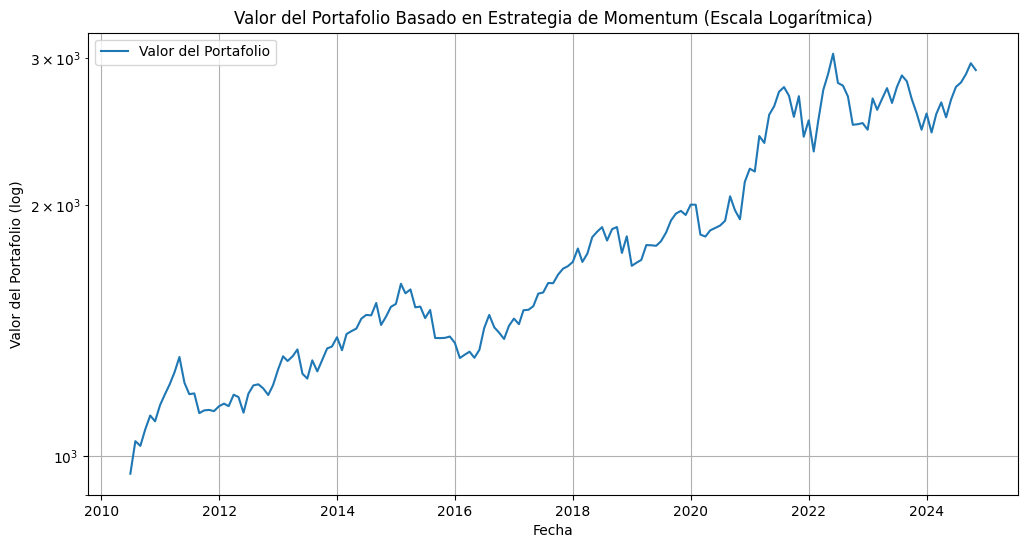

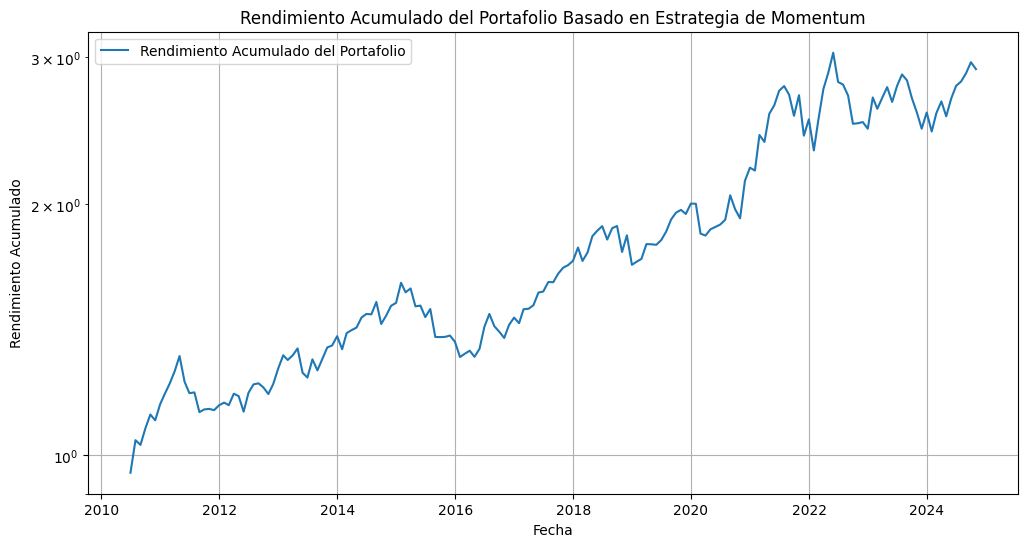

Rendimiento final del portafolio teórico: 190.44%
Rendimiento final del portafolio real: 182.49%
Rendimiento anualizado del portafolio teórico: 7.32%
Rendimiento anualizado del portafolio real: 7.13%
Pérdida porcentual total por coste operacional: -4.17%
Pérdida porcentual anualizada por coste operacional: -2.69%
Volatilidad anualizada del portafolio: 13.35%
Ratio de Sharpe: 0.19
Ratio de Sortino: 0.29
Máximo Drawdown porcentual: -19.54%
Peor año: 2015 con un rendimiento de -10.05%
Mejor año: 2010 con un rendimiento de 19.66%
Correlación entre los activos:
Ticker       AGG       BIL       EFA       GSG       IYR       SPY
Ticker                                                            
AGG     1.000000  0.066090  0.278918 -0.178790  0.466615  0.237510
BIL     0.066090  1.000000 -0.002168 -0.070543 -0.062522 -0.015835
EFA     0.278918 -0.002168  1.000000  0.519479  0.711279  0.868139
GSG    -0.178790 -0.070543  0.519479  1.000000  0.286030  0.466357
IYR     0.466615 -0.062522  0.71127

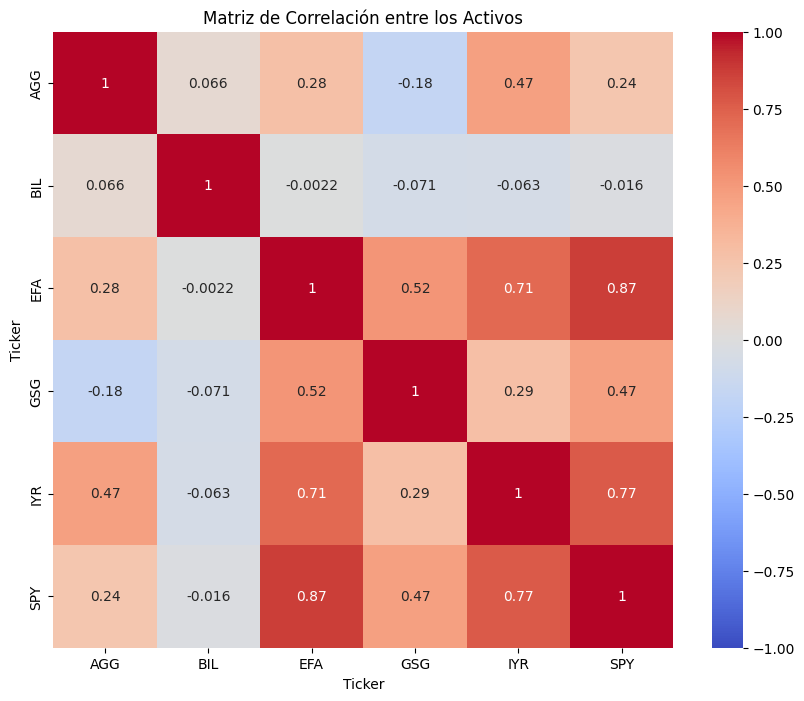

In [18]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

# Función para calcular el momentum
def calculate_momentum(prices, lookback_period):
    momentum = prices / prices.rolling(window=lookback_period).mean() - 1
    return momentum

# Función para obtener los datos históricos de los activos
def get_historical_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    return data

# Función para calcular el Ratio de Sharpe
def sharpe_ratio(returns, risk_free_rate=0.00):       # Revisar risk_free_rate=0.03 porque me termina dando negativo el ratio Sharpe
    excess_returns = returns - risk_free_rate
    return np.mean(excess_returns) / np.std(excess_returns)

# Función para calcular el Ratio de Sortino
def sortino_ratio(returns, risk_free_rate=0.00):      # Revisar risk_free_rate=0.03 porque me termina dando negativo el ratio Sortino 
    excess_returns = returns - risk_free_rate
    negative_returns = excess_returns[excess_returns < 0]
    downside_deviation = np.std(negative_returns)
    return np.mean(excess_returns) / downside_deviation

# Función para calcular el Máximo Drawdown en términos porcentuales
def calculate_max_drawdown(returns):
    cumulative_returns = (1 + returns).cumprod()
    peak = cumulative_returns.cummax()
    drawdown = (cumulative_returns - peak) / peak
    max_drawdown = drawdown.min()
    return max_drawdown

# Función para encontrar el peor año
def worst_year(data):
    data['year'] = data['date'].dt.year
    annual_returns = data.groupby('year')['return'].sum()
    worst_year = annual_returns.idxmin()
    worst_year_return = annual_returns.min()
    return worst_year, worst_year_return

# Función para encontrar el mejor año
def best_year(data):
    data['year'] = data['date'].dt.year
    annual_returns = data.groupby('year')['return'].sum()
    best_year = annual_returns.idxmax()
    best_year_return = annual_returns.max()
    return best_year, best_year_return

# Lista de tickers de los activos
tickers = ['EFA', 'SPY', 'GSG', 'IYR', 'AGG', 'BIL'] 

# Fechas de inicio y fin para obtener los datos históricos
today = datetime.today()
end_date = today
start_date = end_date - timedelta(days=365 * 16 - 30*10 + 1) 

# Calculate the difference in months
difference_months = (end_date.year - start_date.year) * 12 + end_date.month - start_date.month - 1

# Convert the difference in months to years
total_period_years_months = difference_months / 12

total_period_years = end_date.year - start_date.year
start_dat = start_date + relativedelta(weeks=9)
start_dat = start_dat.strftime('%Y-%m-%d')

print('start_date', start_date)
print('start_dat', start_dat)
print('end_date', end_date)
print("difference_months", difference_months) 
print('total_period_years', total_period_years)
print('total_period_years_months', total_period_years_months)

# Obtener los datos históricos de los activos
historical_data = get_historical_data(tickers, start_date, end_date)

# Calcular los precios semanales
monthly_prices = historical_data.resample('ME').ffill()

# Calcular los retornos semanales
monthly_returns = monthly_prices.pct_change(fill_method=None)

# Definir el periodo de lookback para el momentum
lookback_period = 10

# Calcular el momentum para cada activo
momentum = calculate_momentum(monthly_prices, lookback_period)

# Calcular el momentum para cada activo y agregarlos a un DataFrame
df_momentum = pd.DataFrame()

for ticker in tickers:
    df_momentum[ticker + '_mom'] = calculate_momentum(monthly_prices[ticker], lookback_period)

# Inicializar una lista para almacenar las decisiones de inversión mensuales y valores de portafolio
investment_decisions = []
portfolio_values_teorico = []
portfolio_values_real = []
rendimiento = []
rendimiento_acumulado = []

# Inicializar el valor del portafolio teórico (sin comisiones)
initial_portfolio_value_teorico = 1000
portfolio_value_teorico = initial_portfolio_value_teorico

# Costos por comisión y spread compra-venta (faltan los impuestos) - Revisar estructura de costes de IBKR
commision_buy = 0.025 / 100
commision_sell = 0.025 / 100
spread_buy = 0.00000
spread_sell = 0.00000
cost_operational = commision_buy + commision_sell + spread_buy + spread_sell 

# Inicializar el valor del portafolio real (con comisiones)
initial_portfolio_value_real = initial_portfolio_value_teorico * (1 - (commision_buy + spread_buy))
portfolio_value_real = initial_portfolio_value_real

# Itera sobre las fechas desde el día anterior al lookback_period hasta el final
for date in momentum.index[lookback_period:]:  
# Asegúrate de que 'momentum' y 'daily_prices' estén alineados en términos de índices de fechas  
    # Seleccionar los datos hasta la fecha anterior
    previous_date = momentum.index[momentum.index.get_loc(date) - 1]
    previous_momentum = momentum.loc[previous_date]

    # Encontrar el activo con el mejor momentum y su resultado de momentum del día anterior
    best_asset = previous_momentum.idxmax()
    best_momentum = previous_momentum[best_asset]
    
    if best_momentum < 0:
        best_momentum = 0
        best_asset = 'BIL'

    # Obtener el precio semanal del mejor activo para la fecha actual
    if date in monthly_prices.index:
        best_monthly_price = monthly_prices.loc[date, best_asset]
    else:
        best_monthly_price = monthly_prices[best_asset].loc[:date].iloc[-1]
    
    # Calcular el precio promedio del mejor activo en los últimos 10 meses
    last_10_months_prices = monthly_prices[best_asset].loc[:date].iloc[-lookback_period:]
    average_price = last_10_months_prices.mean()
    
    # Calcular el rendimiento del activo seleccionado en el último mes
    asset_return = monthly_returns.loc[date, best_asset]
    
    # Actualizar el valor del portafolio
    portfolio_value_teorico *= (1 + asset_return)
    
    # Registrar la decisión de inversión y el valor del portafolio teórico
    investment_decisions.append((date, best_asset, asset_return, portfolio_value_teorico, best_monthly_price, average_price, best_momentum))
    portfolio_values_teorico.append(portfolio_value_teorico)
    rendimiento.append(1 + asset_return)

# Calcular los rendimientos acumulados
for i in range(len(rendimiento)):
    if i == 0:
        rendimiento_acumulado.append(rendimiento[i])
    else:
        rendimiento_acumulado.append(rendimiento_acumulado[i-1] * rendimiento[i])

# Inicializar una variable para contar los cambios de activos
change_count = 0
# Iterar sobre las decisiones de inversión
prev_asset = None
index_change = []
for decision in investment_decisions:
    current_asset = decision[1]
    if prev_asset is not None and current_asset != prev_asset:
        change_count += 1
        index_change.append(change_count)
    else:
        index_change.append(0)
    prev_asset = current_asset

# Reemplazar números distintos de cero por 1
operations= [1 if x != 0 else 0 for x in index_change]

# Calcular el valor del portafolio real tomando en cuenta los costos operacionales
for i in range(len(rendimiento)):
    # Aplicar el rendimiento del activo
    portfolio_value_real *= rendimiento[i]
    # Descontar el costo operacional si hay un cambio de activo
    if operations[i] == 1:
        portfolio_value_real *= (1 - cost_operational)
    portfolio_values_real.append(portfolio_value_real)

# Convertir los valores de portafolio en una serie de pandas
portfolio_values_series_teorico = pd.Series(data=portfolio_values_teorico, index=momentum.index[lookback_period:])
portfolio_values_series_real = pd.Series(data=portfolio_values_real, index=momentum.index[lookback_period:])

# Calcular el rendimiento acumulado del portafolio
cumulative_returns_teorico = portfolio_values_series_teorico / initial_portfolio_value_teorico - 1
cumulative_returns_real = portfolio_values_series_real / initial_portfolio_value_teorico - 1

# Calcular el rendimiento anualizado del portafolio
annualized_return_teorico = (portfolio_values_series_teorico.iloc[-1] / initial_portfolio_value_teorico) ** (1 / total_period_years_months) - 1
annualized_return_real = (portfolio_values_series_real.iloc[-1] / initial_portfolio_value_teorico) ** (1 / total_period_years_months) - 1

# Calcular la volatilidad del portafolio
volatility = portfolio_values_series_teorico.pct_change().std() * np.sqrt(12)  # Anualizar la volatilidad

# Calcular el Ratio de Sharpe
sharpe = sharpe_ratio(portfolio_values_series_teorico.pct_change())

# Calcular el Ratio de Sortino
sortino = sortino_ratio(portfolio_values_series_teorico.pct_change())

# Calcular el Máximo Drawdown
max_dd = calculate_max_drawdown(portfolio_values_series_teorico.pct_change())

# Calcular el peor año
portfolio_returns = pd.DataFrame({'date': portfolio_values_series_teorico.index, 'return': portfolio_values_series_teorico.pct_change()})
worst_yr, worst_yr_return = worst_year(portfolio_returns)

# Calcular el mejor año
portfolio_returns = pd.DataFrame({'date': portfolio_values_series_teorico.index, 'return': portfolio_values_series_teorico.pct_change()})
best_yr, best_yr_return = best_year(portfolio_returns)

# Mostrar las decisiones de inversión
df_backtesting = pd.DataFrame(data=investment_decisions, columns=['Fecha', 'Activo', 'Rendimiento', 'Portfolio_teórico', 'Precio', 'SMA_10_W', 'Momentum'])
df_backtesting['Fecha'] = df_backtesting['Fecha'].dt.strftime('%Y-%m-%d')
df_backtesting['Operaciones'] = operations
df_backtesting['Rendimiento_acumulado'] = rendimiento_acumulado
df_backtesting['Portfolio_real'] = portfolio_values_real

# Datos de la nueva fila
portfolio_initial = pd.DataFrame({'Fecha': [start_dat], 'Activo': [0], 'Rendimiento': [0], 'Portfolio_teórico': [initial_portfolio_value_teorico], 'Portfolio_real': [initial_portfolio_value_real], 'Operaciones': [0]})

# Rendimiento
return_period_teorico = portfolio_values_series_teorico.iloc[-1] / initial_portfolio_value_teorico - 1
return_period_real = portfolio_values_series_real.iloc[-1] / initial_portfolio_value_teorico - 1

# Insertar la nueva fila en la posición 0:
df_backtesting = pd.concat([portfolio_initial, df_backtesting]).reset_index(drop=True)

print('portfolio_final', portfolio_values_series_teorico.iloc[-1]) 
print('portfolio_inicial', initial_portfolio_value_teorico) 

# Calcular la correlación entre los activos
correlation_matrix = monthly_returns.corr()

# Imprimir el total de cambios de activos
print(f"Total de operaciones concertadas durante el período del backtest: {change_count} - Promedio de operaciones por año: {(change_count/total_period_years):.2f}")

# Graficar el valor del portafolio en escala logarítmica
plt.figure(figsize=(12, 6))
plt.semilogy(portfolio_values_series_teorico, label='Valor del Portafolio')
plt.title('Valor del Portafolio Basado en Estrategia de Momentum (Escala Logarítmica)')
plt.xlabel('Fecha')
plt.ylabel('Valor del Portafolio (log)')
plt.legend()
plt.grid(True)
plt.show()

# Graficar el rendimiento acumulado del portafolio
plt.figure(figsize=(12, 6))
plt.semilogy(cumulative_returns_teorico + 1, label='Rendimiento Acumulado del Portafolio')  # Agregar 1 para evitar log(0)
plt.title('Rendimiento Acumulado del Portafolio Basado en Estrategia de Momentum')
plt.xlabel('Fecha')
plt.ylabel('Rendimiento Acumulado')
plt.legend()
plt.grid(True)
plt.show()

# Mostrar las métricas del portafolio
print(f"Rendimiento final del portafolio teórico: {return_period_teorico:.2%}")
print(f"Rendimiento final del portafolio real: {return_period_real:.2%}")
print(f"Rendimiento anualizado del portafolio teórico: {annualized_return_teorico:.2%}")
print(f"Rendimiento anualizado del portafolio real: {annualized_return_real:.2%}")
print(f"Pérdida porcentual total por coste operacional: {(return_period_real / return_period_teorico - 1):.2%}")
print(f"Pérdida porcentual anualizada por coste operacional: {(annualized_return_real / annualized_return_teorico - 1):.2%}")
print(f"Volatilidad anualizada del portafolio: {volatility:.2%}")
print(f"Ratio de Sharpe: {sharpe:.2f}")
print(f"Ratio de Sortino: {sortino:.2f}")
print(f"Máximo Drawdown porcentual: {max_dd:.2%}")
print(f"Peor año: {worst_yr} con un rendimiento de {worst_yr_return:.2%}")
print(f"Mejor año: {best_yr} con un rendimiento de {best_yr_return:.2%}")

# Mostrar la correlación entre los activos
print("Correlación entre los activos:")
print(correlation_matrix)

# Mostrar la correlación entre los activos con un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Matriz de Correlación entre los Activos')
plt.show() 